<a href="https://colab.research.google.com/github/AlanMarquesRocha/pv_cells_detection_fault/blob/main/comparative_CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Contrast Limited Adaptive Histogram Equalization for Detecting Faults in Photovoltaic Cells**

#### O projeto está dividido nas seguintes etapas:

  1. Implementação da técnica ``CLAHE`` para melhoria do contraste das imagens EL de células FVs de silício mono e policristalino.
  2. Apresentar o histograma de Intensidade de Pixel;
  3. Comparação Visual dos resultados obtidos;
  4. Apresentar o gráfico de Contraste Local para análise da Média e Desvio Padrão do Contraste Local.
  5. Discussão dos Resultados Obtidos.

## **Importação das Bibliotecas necessárias para o projeto**

As células a seguir são responsáveis por receber as bibliotecas necessárias para a implementação do projeto.

### **Bibliotecas necessárias para a abertura da base de dados e ligação do Google Drive com o Colab**

In [1]:
import glob
from skimage import io
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Bibliotecas necessárias para a manipulação de dados, vetores, strings, plotagem de imagens, etc.**

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import random

### **Bibliotecas necessárias para a normalização em 8-bits e implementação da técnica CLAHE**

In [3]:
import cv2
from skimage.color import rgb2gray
from PIL import Image
import albumentations as A
import os

## **Seção 0 - Acesso à Base de Dados**

Acessando as imagens e copiando para um diretório temporário no GDrive.

In [4]:
# Realiza a cópia da pasta com as imagens para o ambiente colab chamado teste_CLAHE
!cp -R /content/gdrive/MyDrive/_code_dissertacao/clahe_test/ /content/teste_CLAHE

print('Operaçao finalizada')

Operaçao finalizada


In [5]:
# Carregando a imagem original e processada.

original_img = cv2.imread('/content/teste_CLAHE/img_poly_original.png')

processed_img = cv2.imread('/content/teste_CLAHE/img_poly_clahe.png')

print('Operação finalizada')

Operação finalizada


array([[[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [61, 61, 61]],

       [[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [60, 60, 60]],

       [[59, 59, 59],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [60, 60, 60]],

       ...,

       [[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]],

       [[61, 61, 61],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [63, 63, 63]],

       [[61, 61, 61],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]]], dtype=uint8)
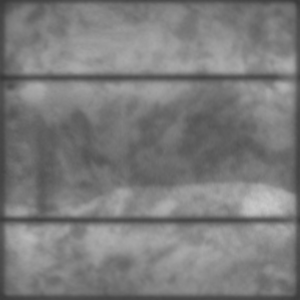

# **Seção 1 - Processando as imagens**

## **Seção 1.1 - Comparação visual das imagens**

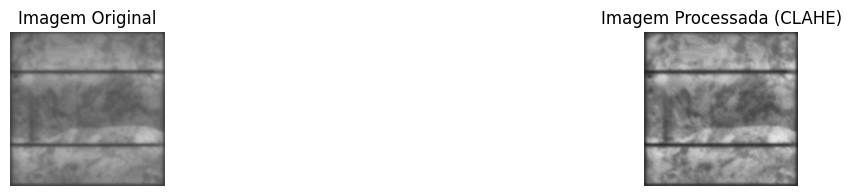

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 2))

axs[0].imshow(original_img)
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(processed_img)
axs[1].set_title('Imagem Processada (CLAHE)')
axs[1].axis('off')

plt.show()

## **Seção 1.2 - Histograma de intensidade dos Pixels**

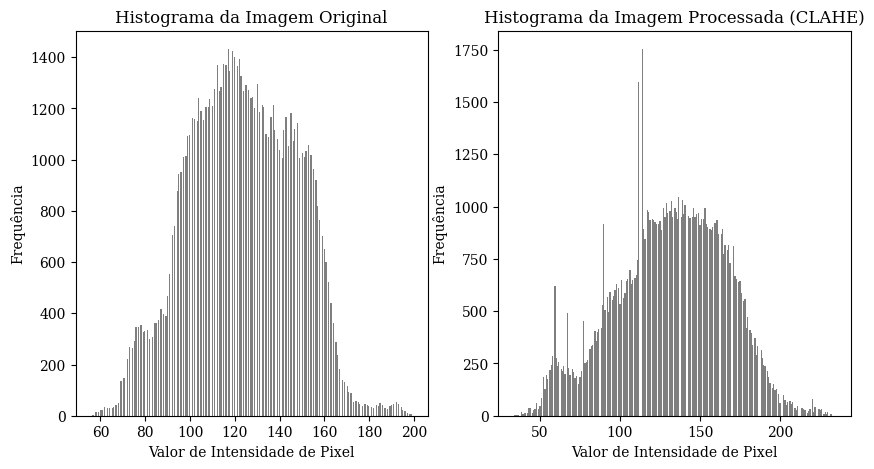

In [13]:
import matplotlib.font_manager as fm

# Configurar a fonte padrão para Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


# Função para plotar histograma
def plot_histogram(image, title, ax):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ax.hist(image.ravel(), bins=256, color='black', alpha=0.5)
    ax.set_xlabel('Valor de Intensidade de Pixel')
    ax.set_ylabel('Frequência')
    ax.set_title(title)

# Converter para RGB
#original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
#processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_histogram(original_img, 'Histograma da Imagem Original', axs[0])
plot_histogram(processed_img, 'Histograma da Imagem Processada (CLAHE)', axs[1])

plt.show()

## **Seção 1.3 - Gráfico do Contraste Local**

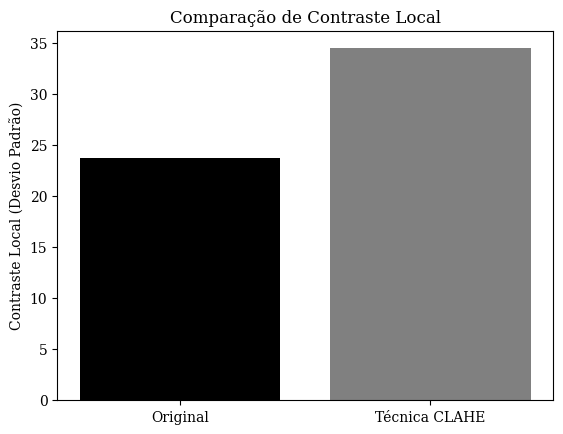

In [16]:
import numpy as np
from skimage import exposure

# Configurar a fonte padrão para Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

def local_contrast(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return np.std(image)

original_contrast = local_contrast(original_img)
processed_contrast = local_contrast(processed_img)

fig, ax = plt.subplots()
ax.bar(['Original', 'Técnica CLAHE'], [original_contrast, processed_contrast], color=['black', 'gray'])
ax.set_ylabel('Contraste Local (Desvio Padrão)')
ax.set_title('Comparação de Contraste Local')

plt.show()